In [5]:
import pandas as pd
import numpy as np


Data Preprocessing

Importing Dataset

In [6]:
df=pd.read_csv(r"F:\THESIS\Data Preprocessing\SuperStoreOrders.csv\SuperStoreOrders.csv")

In [7]:
megaStoreSales_data=df.copy()

In [8]:
megaStoreSales_data=megaStoreSales_data.drop(['order_id','ship_date'],axis=1)

Showing first 10 rows values of this dataset

In [9]:
megaStoreSales_data.head()

,order_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,1/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,1/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,1/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,1/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,1/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


shape the whole dataset

In [10]:
megaStoreSales_data.shape

(51290, 19)

In [11]:
megaStoreSales_data.columns

Index(['order_date', 'ship_mode', 'customer_name', 'segment', 'state',
       'country', 'market', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [12]:
megaStoreSales_data.rename(columns = {'order_priority':'inventory_level'}, inplace = True)
megaStoreSales_data.head()

,order_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,inventory_level,year
0,1/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,1/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,1/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,1/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,1/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


Data types of all columns 

In [13]:
#df.dtypes
megaStoreSales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_date       51290 non-null  object 
 1   ship_mode        51290 non-null  object 
 2   customer_name    51290 non-null  object 
 3   segment          51290 non-null  object 
 4   state            51290 non-null  object 
 5   country          51290 non-null  object 
 6   market           51290 non-null  object 
 7   region           51290 non-null  object 
 8   product_id       51290 non-null  object 
 9   category         51290 non-null  object 
 10  sub_category     51290 non-null  object 
 11  product_name     51290 non-null  object 
 12  sales            51290 non-null  object 
 13  quantity         51290 non-null  int64  
 14  discount         51290 non-null  float64
 15  profit           51290 non-null  float64
 16  shipping_cost    51290 non-null  float64
 17  inventory_le

Cleaning Data

Changing column type object to 'datetime'

In [14]:

megaStoreSales_data['order_date']=pd.to_datetime(megaStoreSales_data['order_date'],dayfirst=True)


Fixing sales column data type from object to float64

In [15]:
megaStoreSales_data['sales'] = pd.to_numeric(megaStoreSales_data['sales'], errors='coerce')


In [16]:
megaStoreSales_data.dtypes


order_date         datetime64[ns]
ship_mode                  object
customer_name              object
segment                    object
state                      object
country                    object
market                     object
region                     object
product_id                 object
category                   object
sub_category               object
product_name               object
sales                     float64
quantity                    int64
discount                  float64
profit                    float64
shipping_cost             float64
inventory_level            object
year                        int64
dtype: object

Checking any null value in all columns

In [17]:
megaStoreSales_data.isnull().any()

order_date         False
ship_mode          False
customer_name      False
segment            False
state              False
country            False
market             False
region             False
product_id         False
category           False
sub_category       False
product_name       False
sales               True
quantity           False
discount           False
profit             False
shipping_cost      False
inventory_level    False
year               False
dtype: bool

Handling missing values of sales

In [18]:
megaStoreSales_data.isnull().sum()

order_date            0
ship_mode             0
customer_name         0
segment               0
state                 0
country               0
market                0
region                0
product_id            0
category              0
sub_category          0
product_name          0
sales              2630
quantity              0
discount              0
profit                0
shipping_cost         0
inventory_level       0
year                  0
dtype: int64

Mean Imputation of Sales

In [19]:
megaStoreSales_data=megaStoreSales_data.fillna(value=megaStoreSales_data['sales'].mean())

In [20]:
megaStoreSales_data.isnull().sum()

order_date         0
ship_mode          0
customer_name      0
segment            0
state              0
country            0
market             0
region             0
product_id         0
category           0
sub_category       0
product_name       0
sales              0
quantity           0
discount           0
profit             0
shipping_cost      0
inventory_level    0
year               0
dtype: int64

Checking duplicate columns

In [21]:
megaStoreSales_data[megaStoreSales_data.duplicated()]

,order_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,inventory_level,year


Checking unique values of columns

In [22]:
megaStoreSales_data.nunique()

order_date          1430
ship_mode              4
customer_name        795
segment                3
state               1094
country              147
market                 7
region                13
product_id         10292
category               3
sub_category          17
product_name        3788
sales                994
quantity              14
discount              27
profit             24575
shipping_cost      10037
inventory_level        4
year                   4
dtype: int64

Showing min,max,count,std,25%,75% and mean values of numeric features

In [23]:
megaStoreSales_data.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,161.017838,3.476545,0.142908,28.641740,26.375915,2012.777208
std,195.868856,2.278766,0.212280,174.424113,57.296804,1.098931
min,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,31.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,196.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,999.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000


EDA

In [24]:
megaStoreSales_data_analysis=megaStoreSales_data.copy()
megaStoreSales_data_analysis=megaStoreSales_data_analysis.loc[:,['order_date','sales','profit']]
megaStoreSales_data_analysis.set_index('order_date',inplace=True)
megaStoreSales_data_analysis.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51290 entries, 2011-01-01 to 2014-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   51290 non-null  float64
 1   profit  51290 non-null  float64
dtypes: float64(2)
memory usage: 1.2 MB


Visualizing sales and profit from 2011 to 2015

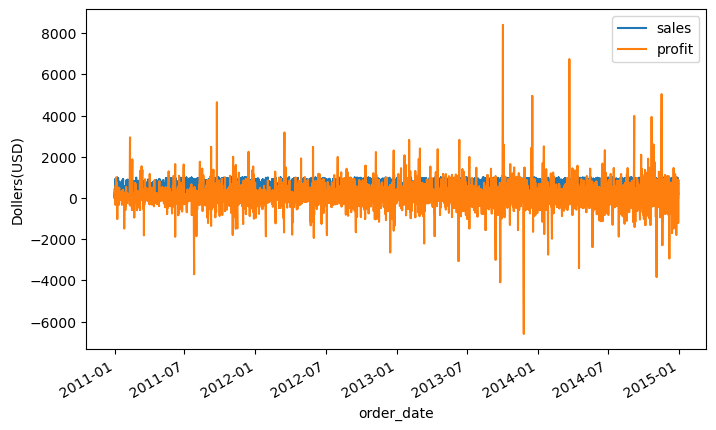

In [25]:
import matplotlib.pyplot as plt
import matplotlib

ax=megaStoreSales_data_analysis.plot()
plt.gcf().set_size_inches(8,5)
ax.set_ylabel("Dollers(USD)")
plt.show()

In [26]:
#ax=megaStoreSales_data_analysis.plot()
#megaStoreSales_data_analysis.set_index('sales',inplace=True)
#sns.boxplot(megaStoreSales_data_analysis['profit'])

array([[<AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'profit'}>]], dtype=object)

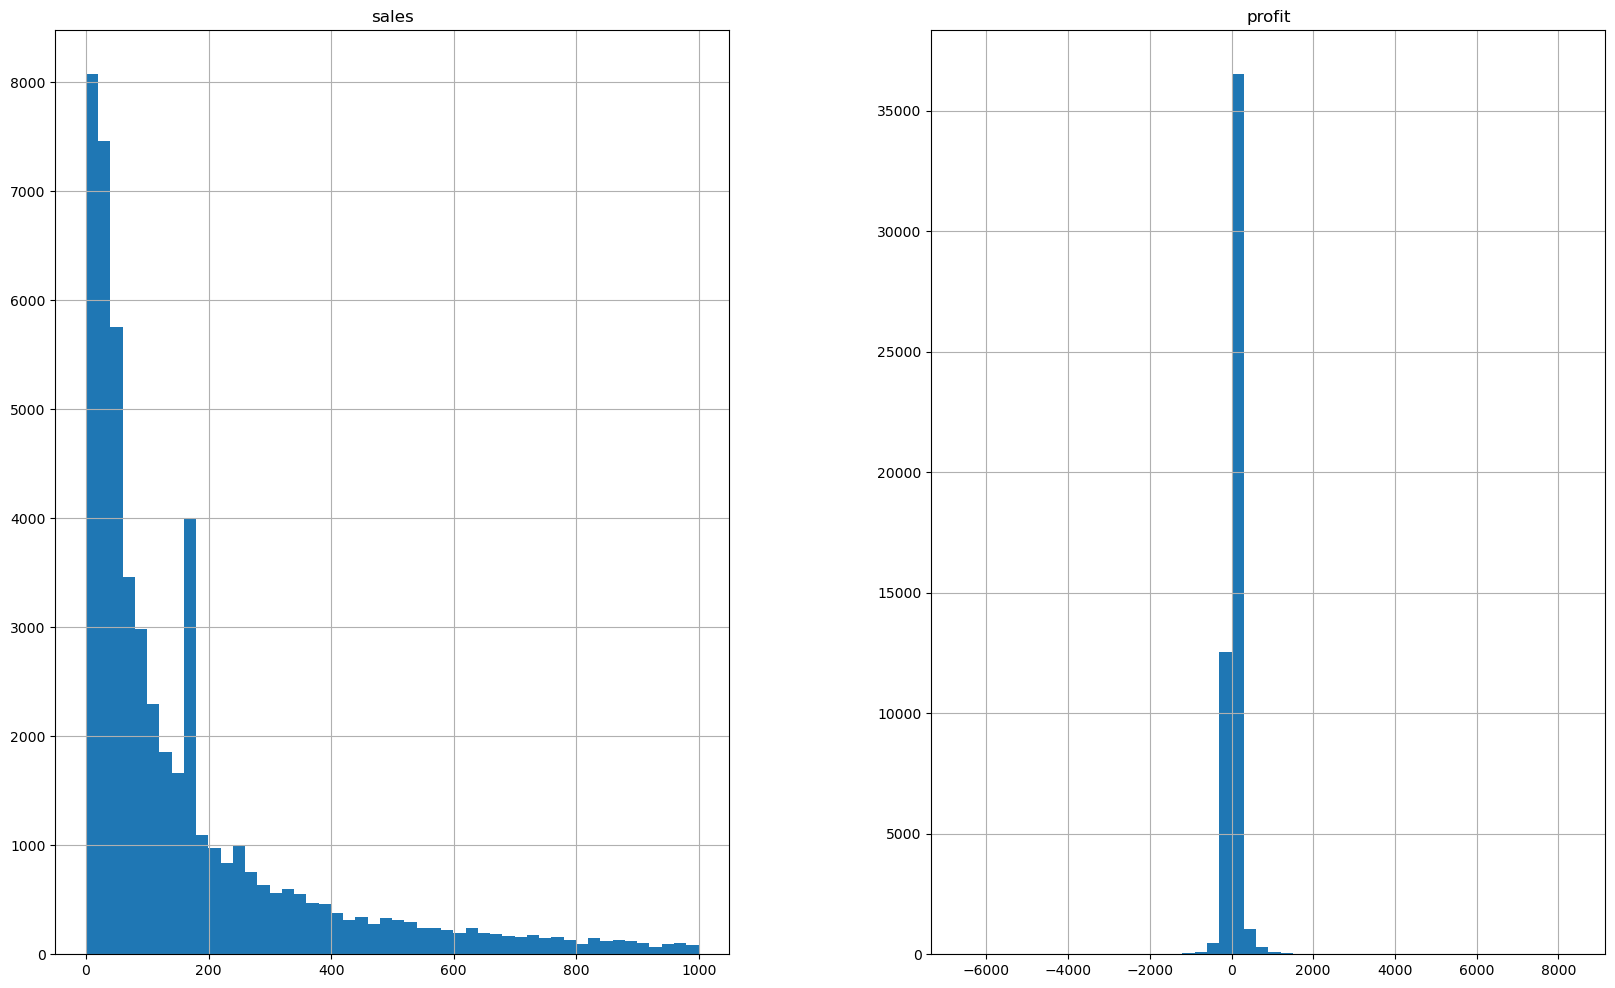

In [27]:
megaStoreSales_data_analysis.hist(bins=50,figsize=(20,12))

In [28]:
megaStoreSales_data_analysis=megaStoreSales_data.loc[:,['order_date','segment','sales','profit']]

In [29]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [30]:
import seaborn as sns

In [31]:
df['segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: segment, dtype: int64

In [32]:
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

<AxesSubplot:xlabel='segment', ylabel='count'>

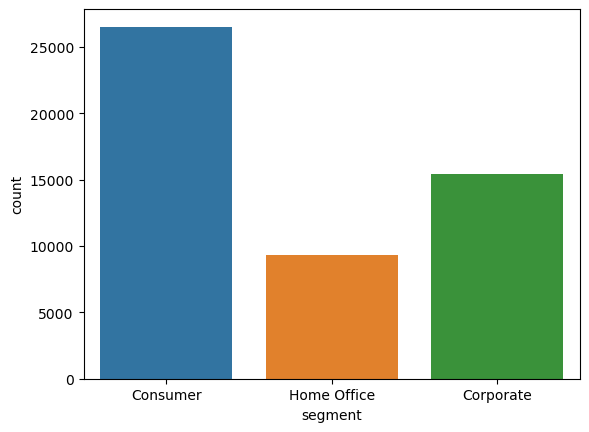

In [33]:
sns.countplot(x=df['segment'])

<AxesSubplot:xlabel='region', ylabel='count'>

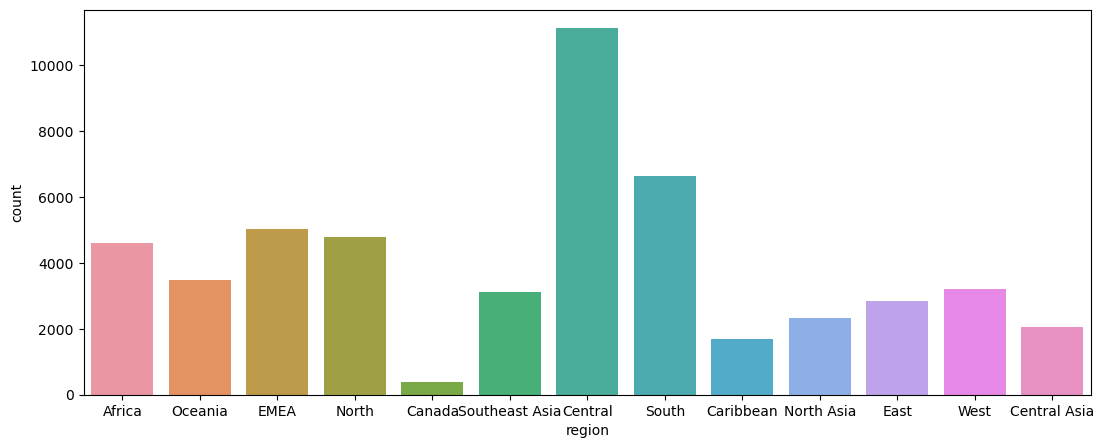

In [34]:
plt.figure(figsize=(13,5))
sns.countplot(x=df['region'])

<AxesSubplot:ylabel='order_priority'>

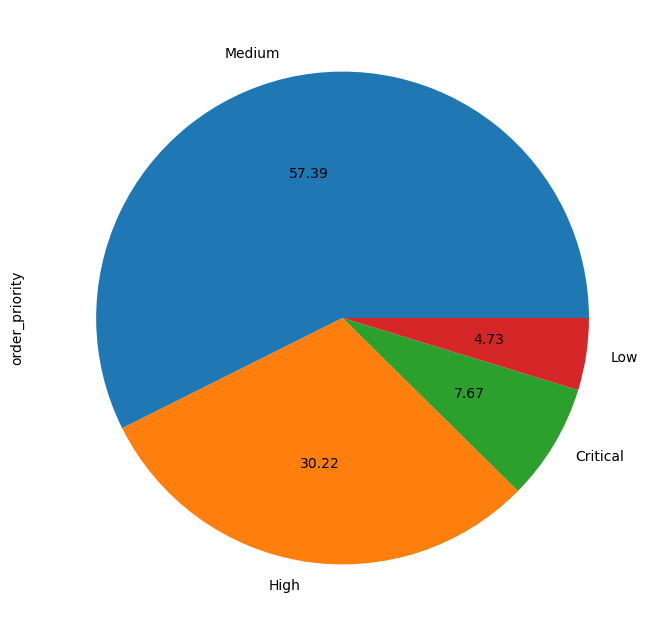

In [35]:
plt.figure(figsize=(10,8))
df['order_priority'].value_counts().plot(kind='pie',autopct='%.2f')

Text(24.0, 0.5, 'Dollers(USD)')

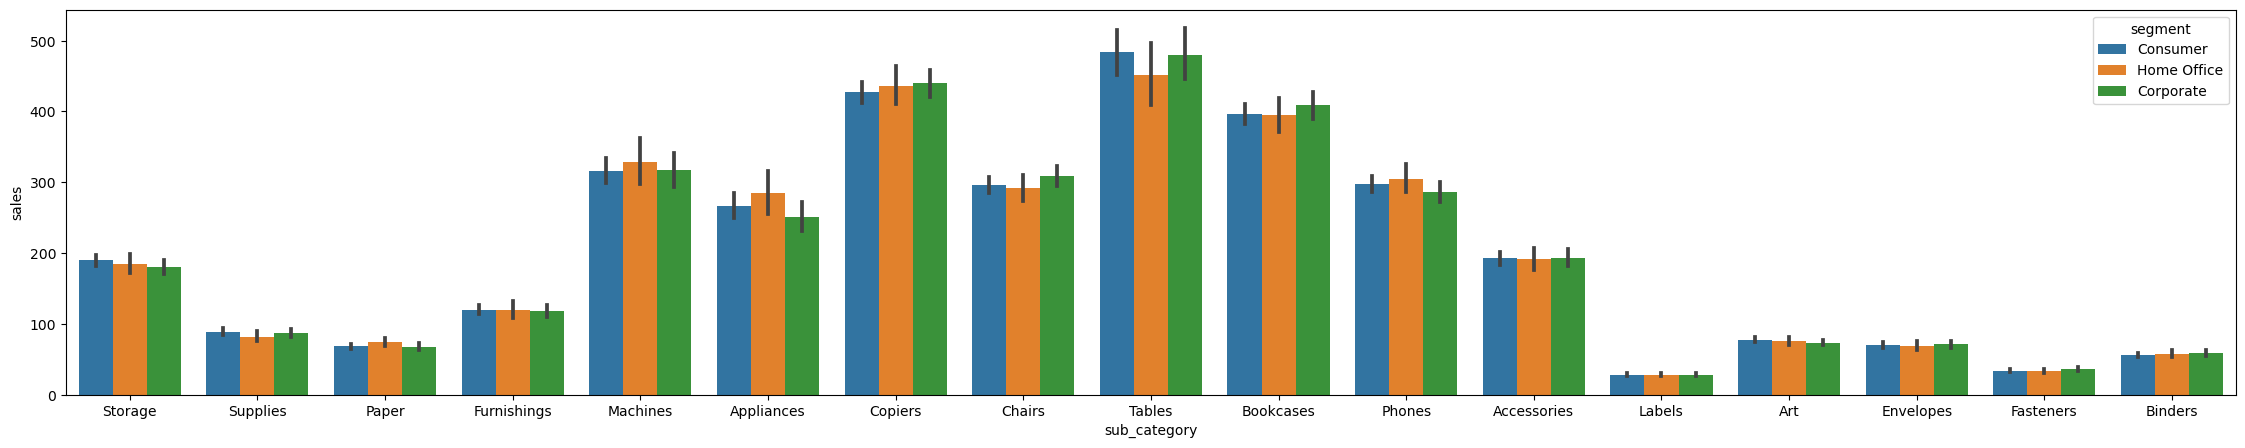

In [36]:
plt.gcf().set_size_inches(28,5)
sns.barplot(x='sub_category',y='sales',hue=df['segment'],data=df)
ax.set_ylabel("Dollers(USD)")

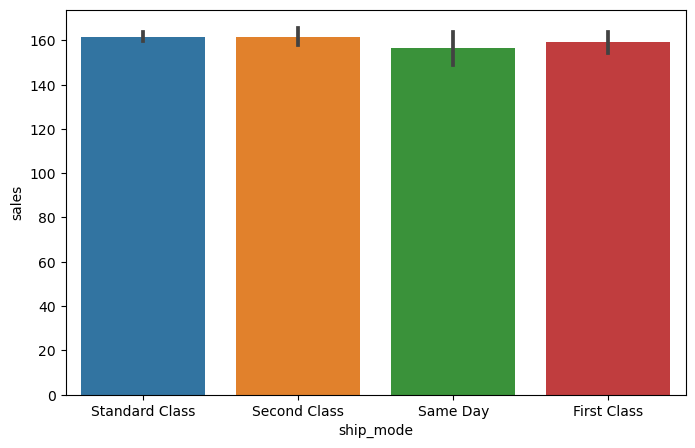

In [37]:
sns.barplot(x='ship_mode',y='sales',data=df)
plt.gcf().set_size_inches(8,5)
#ax.set_ylabel("Dollers(USD)")

<AxesSubplot:xlabel='category', ylabel='sales'>

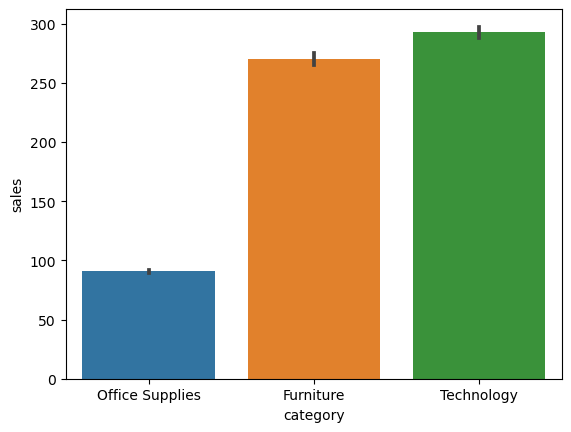

In [38]:
sns.barplot(x='category',y='sales',data=df)

<AxesSubplot:xlabel='ship_mode', ylabel='sales'>

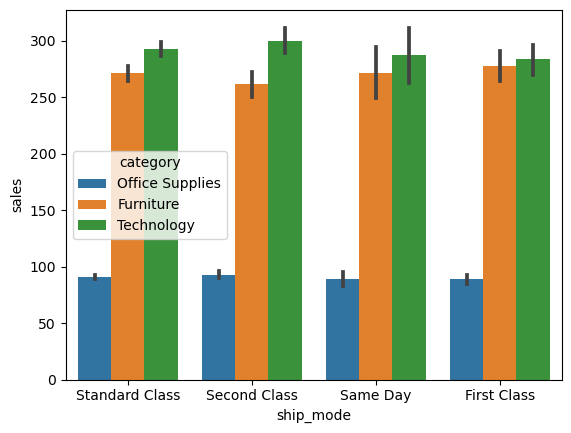

In [39]:
sns.barplot(x='ship_mode',y='sales',hue=df['category'],data=df)
#plt.gcf().set_size_inches(8,5)


<AxesSubplot:xlabel='order_priority', ylabel='sales'>

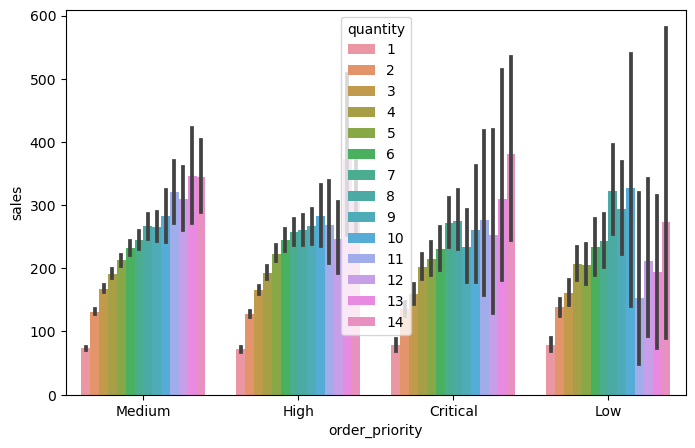

In [40]:
plt.gcf().set_size_inches(8,5)
sns.barplot(x='order_priority',y='sales',hue=df['quantity'],data=df)

<AxesSubplot:xlabel='sales', ylabel='region'>

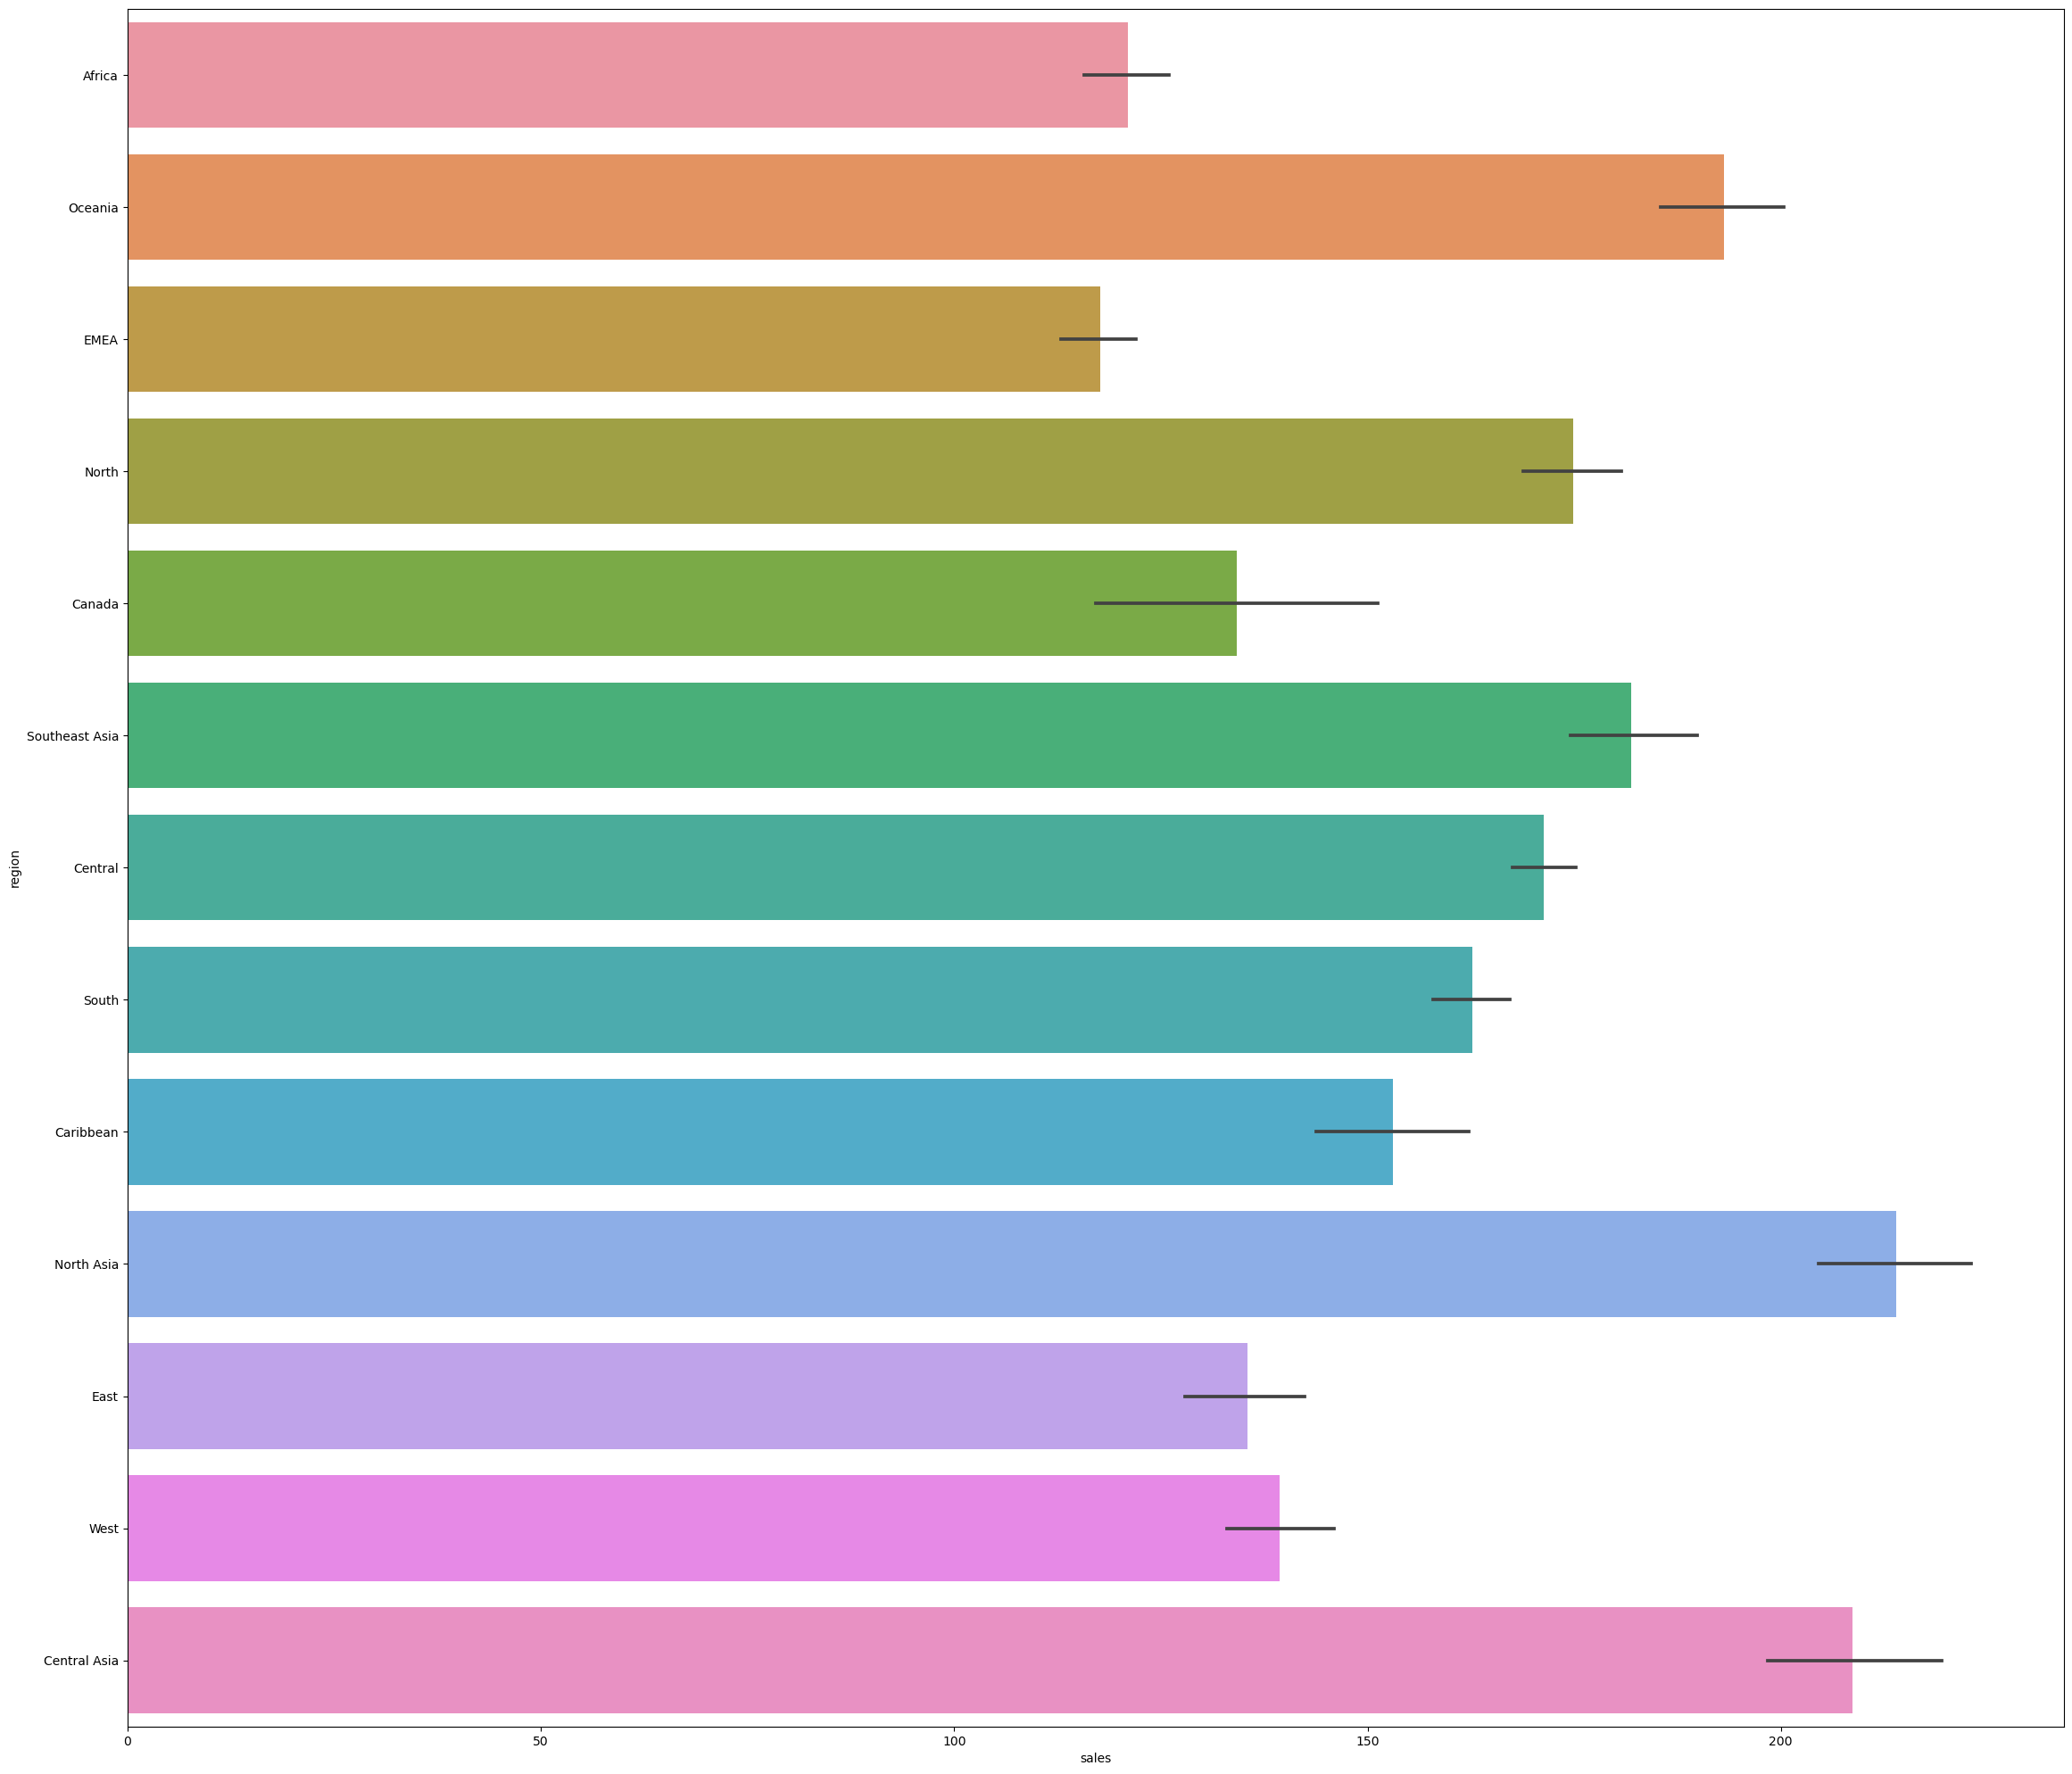

In [41]:
plt.figure(figsize=(54,66))
plt.gcf().set_size_inches(28,25)
sns.barplot(x='sales',y='region',data=df)
#plt.figure(figsize=(56,6))


array([[<AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'quantity'}>],
       [<AxesSubplot:title={'center':'discount'}>,
        <AxesSubplot:title={'center':'profit'}>],
       [<AxesSubplot:title={'center':'shipping_cost'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

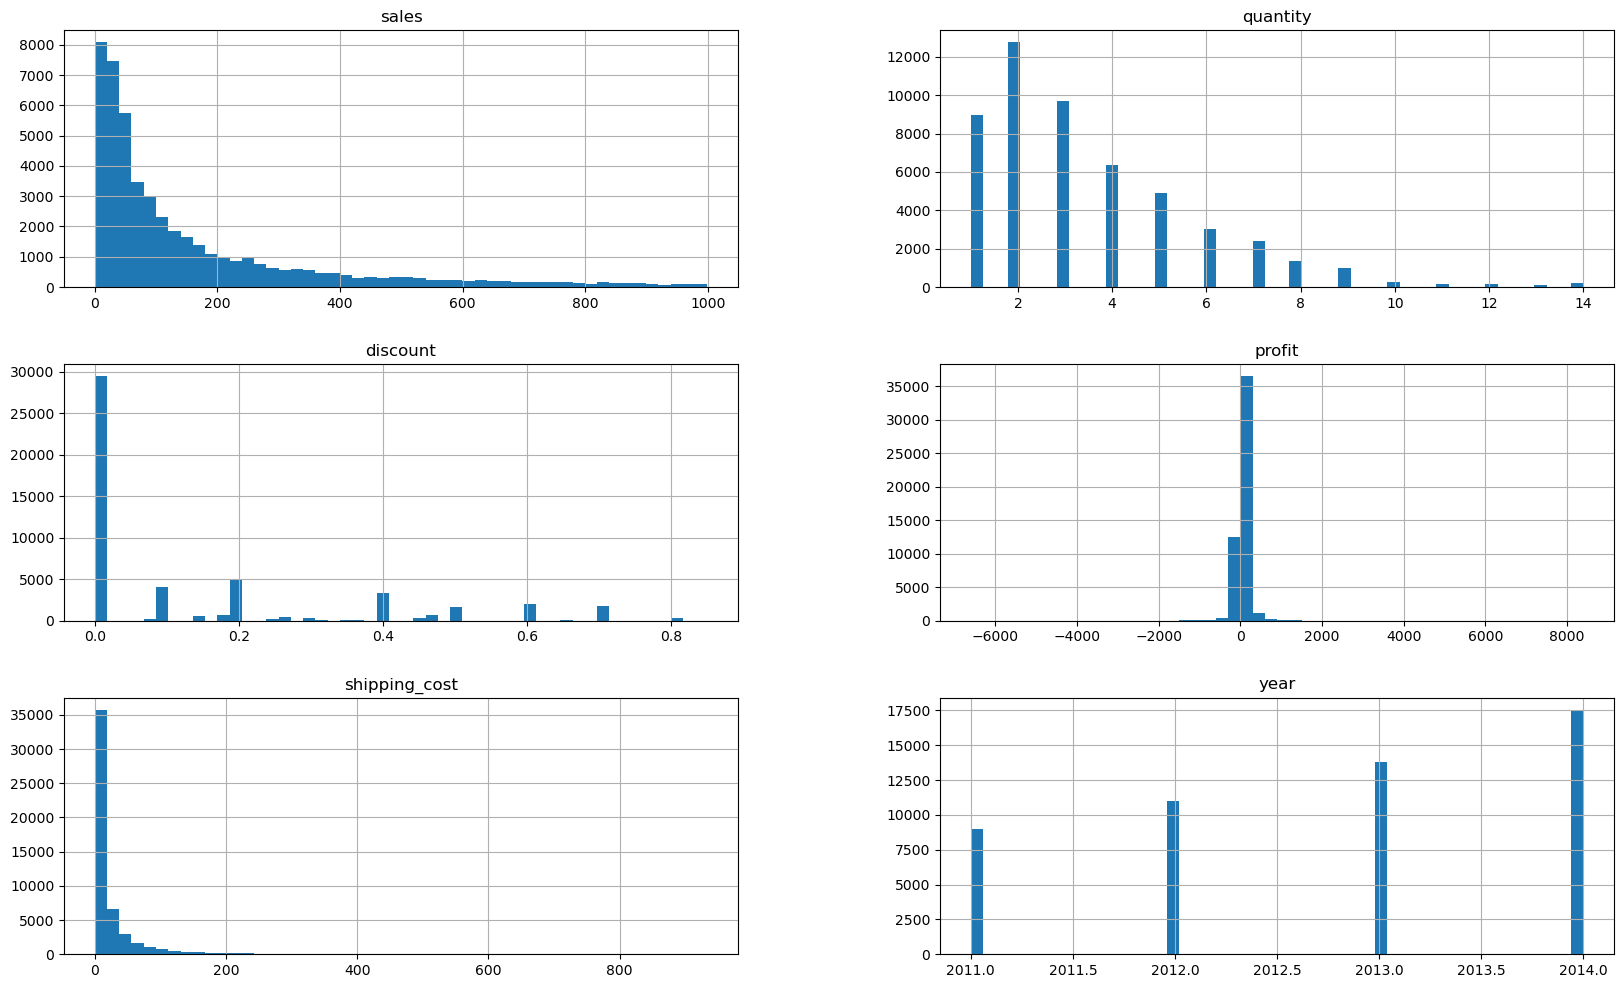

In [42]:
df.hist(bins=50,figsize=(20,12))

<AxesSubplot:xlabel='region', ylabel='sales'>

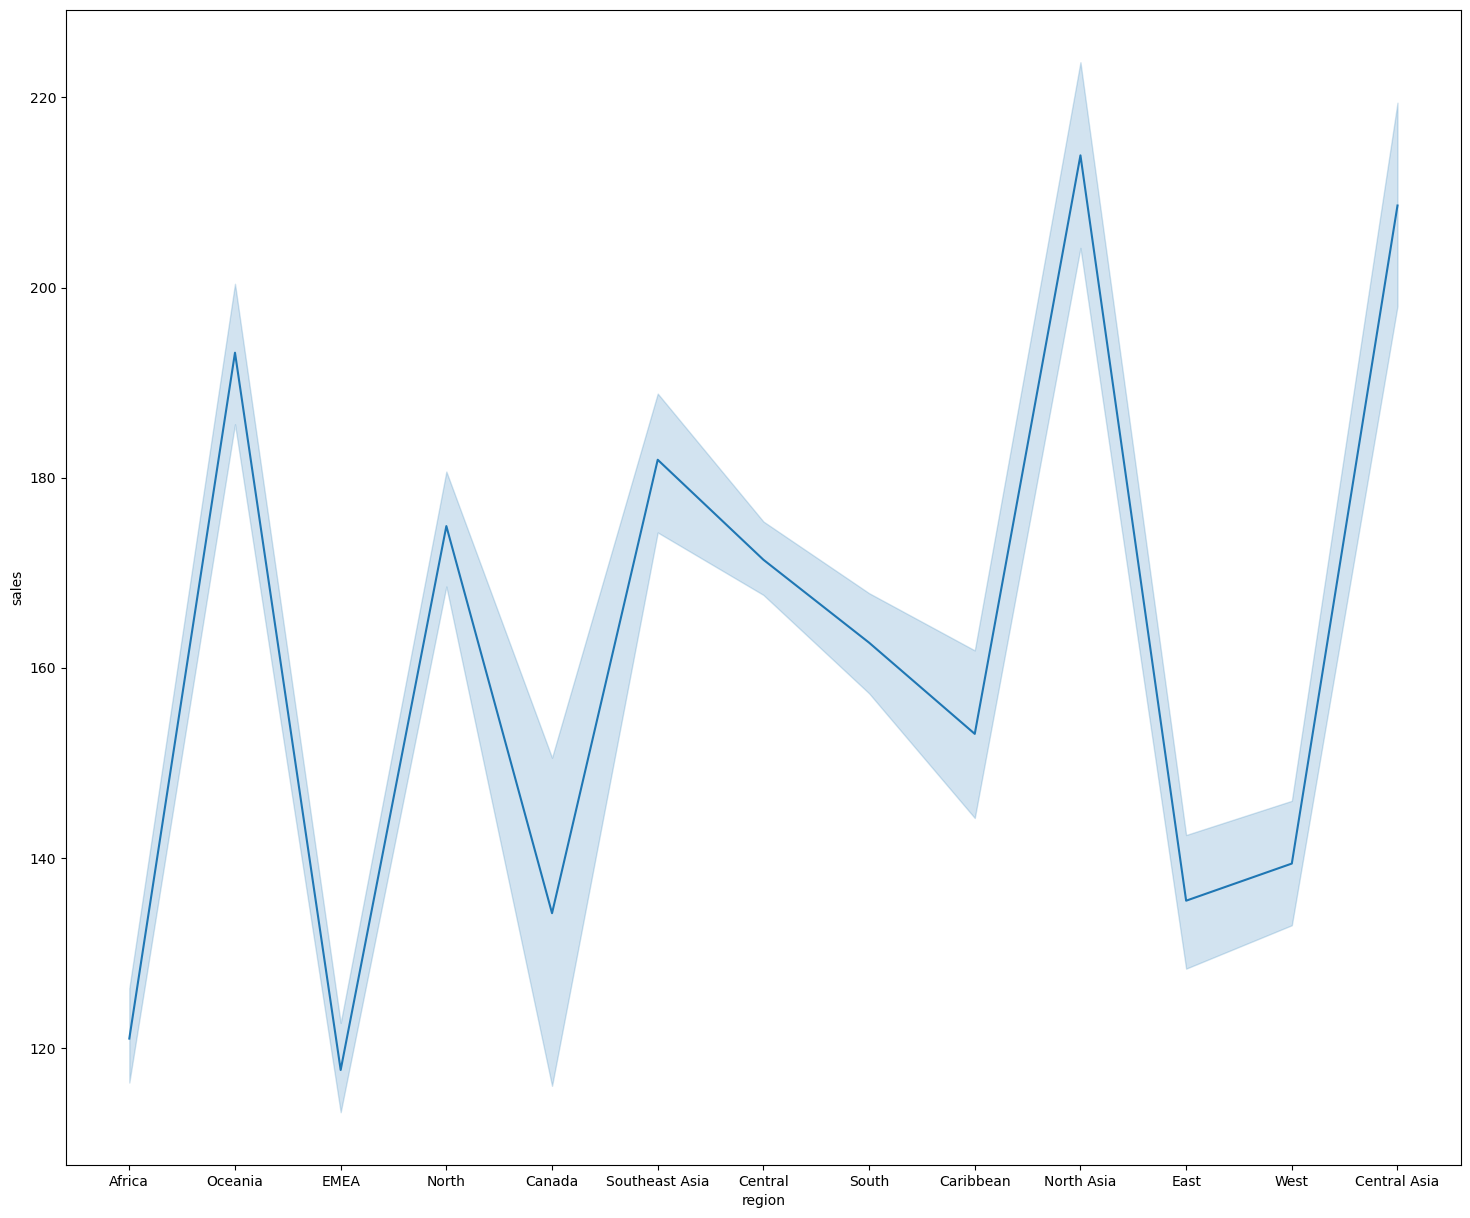

In [43]:
plt.gcf().set_size_inches(18,15)
sns.lineplot(x='region', y= 'sales', data=df)

<AxesSubplot:xlabel='sales', ylabel='profit'>

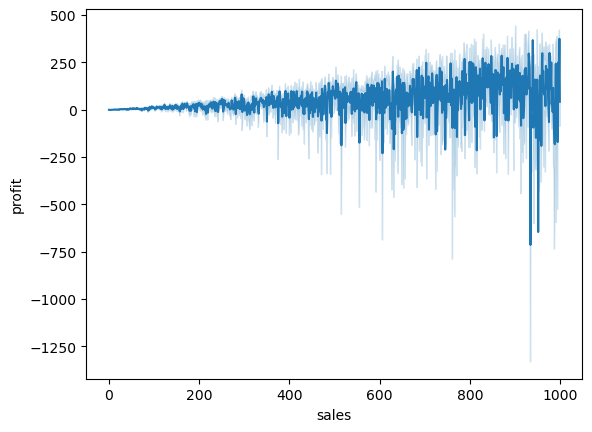

In [44]:
#plt.gcf().set_size_inches(28,25)
sns.lineplot(x='sales', y= 'profit', data=df)

In [45]:
df['region'].value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: region, dtype: int64

Text(0.5, 0, 'order_priority')

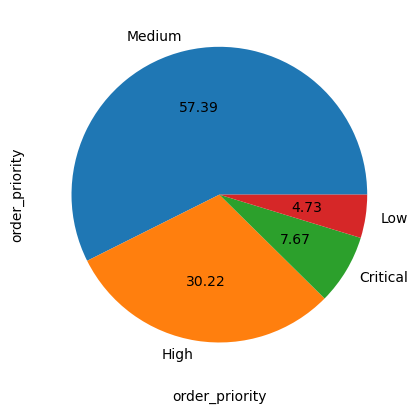

In [46]:
#plt.figure(figsize=(8,10))
df['order_priority'].value_counts().plot(kind='pie',autopct='%.2f')
plt.xlabel('order_priority')


c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quantity', ylabel='Density'>

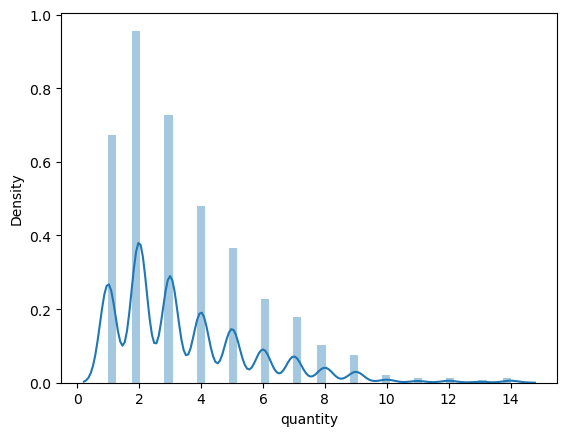

In [47]:
sns.distplot(df['quantity'])

In [48]:
df['discount'].max()

0.85

In [49]:
df['discount'].mean()

0.14290754533046662

<AxesSubplot:xlabel='quantity', ylabel='profit'>

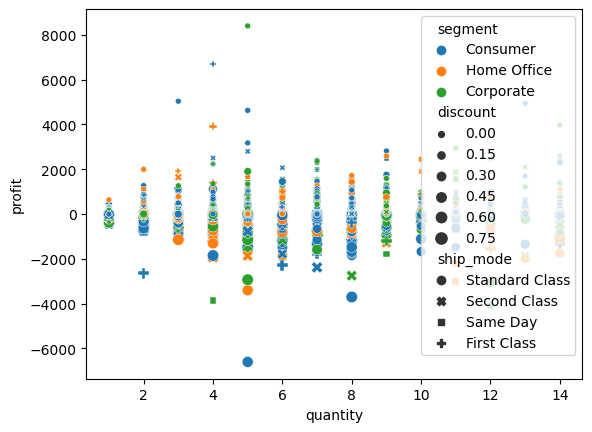

In [50]:
sns.scatterplot(x='quantity',y='profit',hue='segment',style='ship_mode',size='discount',data=df)

In [51]:
#plt.plot(order_date)

In [52]:
#plt.figure(figsize=(12,18))
#sns.barplot(x='profit',y='sales',data=df)

<AxesSubplot:xlabel='sales', ylabel='profit'>

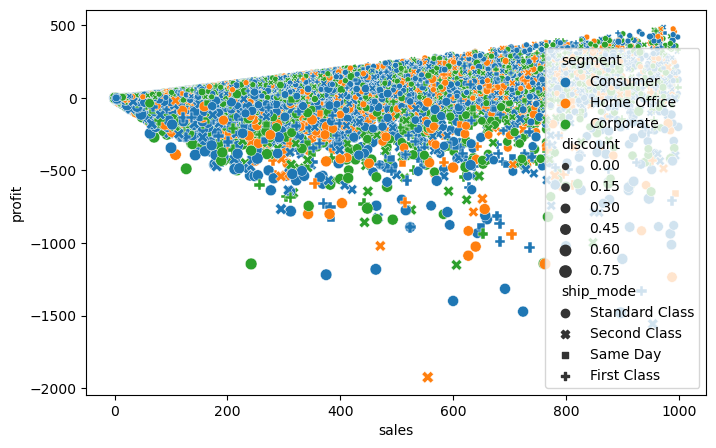

In [53]:
plt.gcf().set_size_inches(8,5)
sns.scatterplot(x='sales',y='profit',hue='segment',style='ship_mode',size='discount',data=df)

In [54]:
pd.crosstab(df['category'],df['region'])

region,Africa,Canada,Caribbean,Central,Central Asia,EMEA,East,North,North Asia,Oceania,South,Southeast Asia,West
category,,,,,,,,,,,,,
Furniture,631,42,376,2046,478,770,601,945,522,742,1329,687,707
Office Supplies,3045,277,973,6936,1111,3297,1712,2914,1332,1961,4045,1773,1897
Technology,911,65,341,2135,459,962,535,926,484,784,1271,669,599


<AxesSubplot:xlabel='region', ylabel='category'>

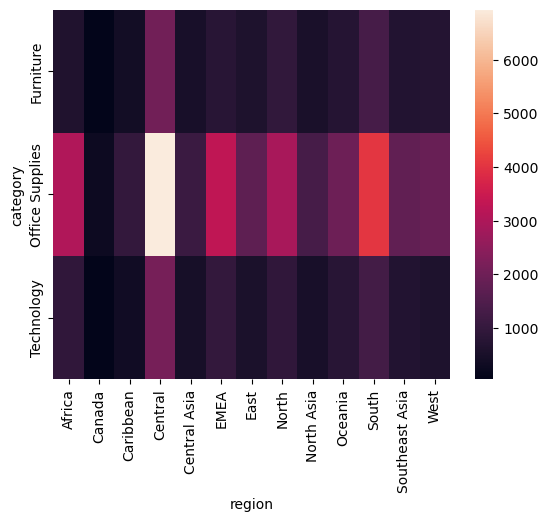

In [55]:
#color represents the magnitude  of co-relation
sns.heatmap(pd.crosstab(df['category'],df['region']))

In [56]:
pd.crosstab(df['segment'],df['region'])

region,Africa,Canada,Caribbean,Central,Central Asia,EMEA,East,North,North Asia,Oceania,South,Southeast Asia,West
segment,,,,,,,,,,,,,
Consumer,2381,202,828,5782,1042,2538,1469,2468,1170,1837,3479,1650,1672
Corporate,1312,110,507,3321,613,1574,877,1487,708,1053,1998,909,960
Home Office,894,72,355,2014,393,917,502,830,460,597,1168,570,571


<AxesSubplot:xlabel='region', ylabel='segment'>

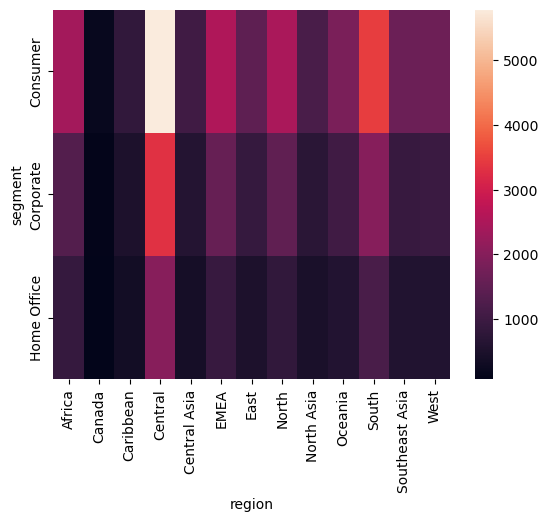

In [57]:
sns.heatmap(pd.crosstab(df['segment'],df['region']))

<AxesSubplot:xlabel='sales', ylabel='category'>

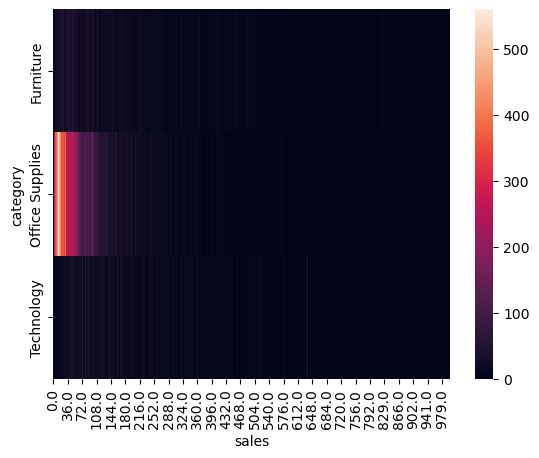

In [58]:
sns.heatmap(pd.crosstab(df['category'],df['sales']))

<AxesSubplot:xlabel='sales', ylabel='region'>

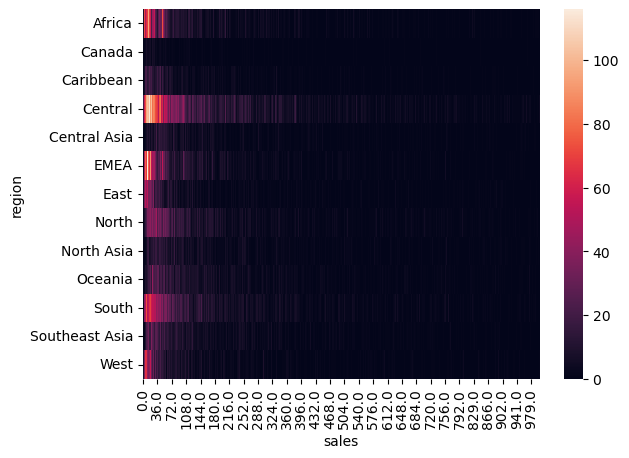

In [59]:
sns.heatmap(pd.crosstab(df['region'],df['sales']))

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

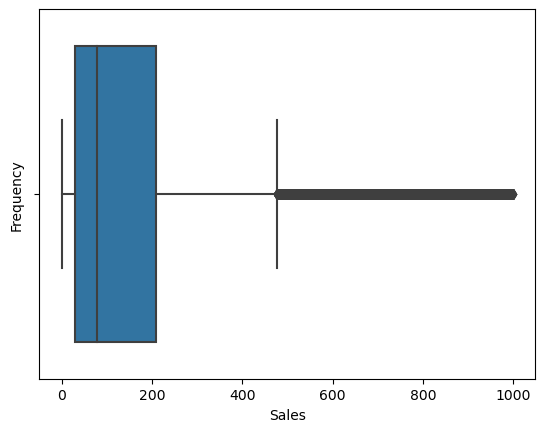

In [60]:
sns.boxplot(df['sales'])
plt.xlabel('Sales')
plt.ylabel('Frequency')

Finding the catagorical data

In [61]:
megaStoreSales_data_list=list(megaStoreSales_data.columns)

In [62]:
megaStoreSales_data_cat=[]
for i in megaStoreSales_data_list:
    if megaStoreSales_data[i].dtype=='object':
        megaStoreSales_data_cat.append(i)

megaStoreSales_data_cat

['ship_mode',
 'customer_name',
 'segment',
 'state',
 'country',
 'market',
 'region',
 'product_id',
 'category',
 'sub_category',
 'product_name',
 'inventory_level']

Encoding the catagorical data

In [63]:
from sklearn.preprocessing import LabelEncoder
labelencodeer=LabelEncoder()

In [64]:
for i in megaStoreSales_data_cat:
    megaStoreSales_data[i]=labelencodeer.fit_transform(megaStoreSales_data[i])

In [65]:
megaStoreSales_data.head(10)


,order_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,inventory_level,year
0,2011-01-01,3,751,0,255,2,1,0,7846,1,14,3413,408.0,2,0.0,106.140,35.46,3,2011
1,2011-01-01,3,398,0,702,6,0,9,7464,1,15,168,120.0,3,0.1,36.036,9.72,3,2011
2,2011-01-01,2,48,0,175,56,3,5,7858,1,14,3382,66.0,4,0.0,29.640,8.17,1,2011
3,2011-01-01,2,275,2,939,123,4,7,6206,1,12,1330,45.0,3,0.5,-26.055,4.82,1,2011
4,2011-01-01,3,398,0,702,6,0,9,1492,0,9,1228,114.0,5,0.1,37.770,4.70,3,2011
5,2011-01-01,3,398,0,702,6,0,9,6279,1,12,1143,55.0,2,0.1,15.342,1.80,3,2011
6,2011-01-02,3,483,0,748,22,2,1,9588,2,11,2662,314.0,1,0.0,3.120,24.10,3,2011
7,2011-01-03,1,429,1,702,6,0,9,2375,1,1,1916,276.0,1,0.1,110.412,125.32,0,2011
8,2011-01-03,3,442,0,96,91,0,9,8933,2,6,1777,912.0,4,0.4,-319.464,107.10,2,2011
9,2011-01-03,3,465,1,710,60,3,5,1767,0,5,2560,667.0,4,0.0,253.320,81.26,1,2011


OneHotEncoding 

In [66]:

megaStoreSales_data_final = pd.get_dummies(megaStoreSales_data, columns = ['ship_mode','segment','market','region','category','inventory_level'])
megaStoreSales_data_final.head()


,order_date,customer_name,state,country,product_id,sub_category,product_name,sales,quantity,discount,...,region_10,region_11,region_12,category_0,category_1,category_2,inventory_level_0,inventory_level_1,inventory_level_2,inventory_level_3
0,2011-01-01,751,255,2,7846,14,3413,408.0,2,0.0,...,0,0,0,0,1,0,0,0,0,1
1,2011-01-01,398,702,6,7464,15,168,120.0,3,0.1,...,0,0,0,0,1,0,0,0,0,1
2,2011-01-01,48,175,56,7858,14,3382,66.0,4,0.0,...,0,0,0,0,1,0,0,1,0,0
3,2011-01-01,275,939,123,6206,12,1330,45.0,3,0.5,...,0,0,0,0,1,0,0,1,0,0
4,2011-01-01,398,702,6,1492,9,1228,114.0,5,0.1,...,0,0,0,1,0,0,0,0,0,1


Prediction for Profit

Independent and dependent variable

In [67]:
X=megaStoreSales_data_final.drop(['order_date','profit'],axis=1)
Y=megaStoreSales_data_final['profit']

In [68]:
X.columns

Index(['customer_name', 'state', 'country', 'product_id', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'shipping_cost',
       'year', 'ship_mode_0', 'ship_mode_1', 'ship_mode_2', 'ship_mode_3',
       'segment_0', 'segment_1', 'segment_2', 'market_0', 'market_1',
       'market_2', 'market_3', 'market_4', 'market_5', 'market_6', 'region_0',
       'region_1', 'region_2', 'region_3', 'region_4', 'region_5', 'region_6',
       'region_7', 'region_8', 'region_9', 'region_10', 'region_11',
       'region_12', 'category_0', 'category_1', 'category_2',
       'inventory_level_0', 'inventory_level_1', 'inventory_level_2',
       'inventory_level_3'],
      dtype='object')

Splitting train test data

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=2)

Feature Scaled by Standardization

In [70]:
X_train

,customer_name,state,country,product_id,sub_category,product_name,sales,quantity,discount,shipping_cost,...,region_10,region_11,region_12,category_0,category_1,category_2,inventory_level_0,inventory_level_1,inventory_level_2,inventory_level_3
43638,500,740,57,3768,3,882,103.0,2,0.0,12.95,...,0,0,0,0,1,0,0,0,0,1
51018,370,964,81,5692,10,1868,19.0,4,0.0,0.50,...,0,0,0,0,1,0,0,0,0,1
38316,484,873,4,4273,7,2180,44.0,3,0.4,7.50,...,1,0,0,0,1,0,0,1,0,0
8898,572,1056,6,3281,2,3070,78.0,3,0.1,10.08,...,0,0,0,0,1,0,0,1,0,0
13508,640,436,139,10071,13,1533,659.0,4,0.2,37.56,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44566,666,1061,115,1070,9,1107,49.0,1,0.0,7.19,...,0,0,0,1,0,0,0,1,0,0
30280,223,216,21,7328,2,3265,25.0,1,0.0,1.90,...,0,0,0,0,1,0,0,0,0,1
6637,498,911,112,4297,7,2074,47.0,2,0.0,6.71,...,0,1,0,0,1,0,0,1,0,0
35343,437,820,6,7267,14,1248,59.0,2,0.4,5.05,...,0,0,0,0,1,0,0,0,1,0


In [71]:
X.describe()

,customer_name,state,country,product_id,sub_category,product_name,sales,quantity,discount,shipping_cost,...,region_10,region_11,region_12,category_0,category_1,category_2,inventory_level_0,inventory_level_1,inventory_level_2,inventory_level_3
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,...,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,398.191870,561.391499,79.073738,5098.597075,7.497446,1877.063755,161.017838,3.476545,0.142908,26.375915,...,0.129557,0.061006,0.062449,0.192552,0.609729,0.197719,0.076662,0.302223,0.047261,0.573855
std,229.209363,304.130849,46.684209,2859.773646,4.844664,1090.949227,195.868856,2.278766,0.212280,57.296804,...,0.335819,0.239344,0.241971,0.394308,0.487816,0.398283,0.266057,0.459226,0.212198,0.494520
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199.000000,311.000000,44.000000,2915.250000,3.000000,882.000000,31.000000,2.000000,0.000000,2.610000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,399.000000,572.000000,81.000000,5041.000000,7.000000,1862.000000,85.000000,3.000000,0.000000,7.790000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,597.000000,820.000000,134.000000,7386.000000,12.000000,2904.000000,196.000000,5.000000,0.200000,24.450000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,794.000000,1093.000000,146.000000,10291.000000,16.000000,3787.000000,999.000000,14.000000,0.850000,933.570000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [73]:
X_train.std()

1.0

In [74]:
X_train

array([[ 0.44130034,  0.58741105, -0.46988567, ..., -0.65888825,
        -0.22264956,  0.86313555],
       [-0.12568527,  1.32376229,  0.04408621, ..., -0.65888825,
        -0.22264956,  0.86313555],
       [ 0.3715175 ,  1.0246196 , -1.60490691, ...,  1.51770805,
        -0.22264956, -1.15856658],
       ...,
       [ 0.43257749,  1.14953633,  0.70796656, ...,  1.51770805,
        -0.22264956, -1.15856658],
       [ 0.16653039,  0.85039363, -1.56207592, ..., -0.65888825,
         4.49136311, -1.15856658],
       [ 0.66809459,  1.24158023,  0.94353701, ..., -0.65888825,
        -0.22264956, -1.15856658]])

In [75]:
X_test

array([[-0.54438233,  0.09103141,  0.85787503, ...,  1.51770805,
        -0.22264956, -1.15856658],
       [ 0.00515756,  1.04105601, -0.94102656, ...,  1.51770805,
        -0.22264956, -1.15856658],
       [ 1.65377726,  0.70904049,  1.28618493, ..., -0.65888825,
        -0.22264956, -1.15856658],
       ...,
       [-0.27397381, -1.21401968,  1.28618493, ...,  1.51770805,
        -0.22264956, -1.15856658],
       [ 0.34534893, -0.82283308,  1.26476943, ..., -0.65888825,
        -0.22264956,  0.86313555],
       [ 0.53289032, -0.63874527, -0.66262513, ..., -0.65888825,
        -0.22264956,  0.86313555]])

In [76]:
Y_train

43638    18.4200
51018     3.7600
38316     7.2600
8898      9.5670
13508    49.4376
          ...   
44566     6.8400
30280     7.9200
6637     15.5400
35343   -24.4800
23720   -69.3000
Name: profit, Length: 41032, dtype: float64

In [77]:
Y_test

17051     21.42000
35660    -29.48000
17233     -3.09400
46309     48.78000
43614    185.52000
           ...    
26744     -3.78900
24894    196.74024
27986    944.98650
27551     19.59600
38260      2.61000
Name: profit, Length: 10258, dtype: float64

MODELS

1.Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

print("Training Score:",lr.score(X_train,Y_train)*100)
print("Testing Score:",lr.score(X_test,Y_test)*100)

print("R2_score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,Y_pred)))


Training Score: 23.406859894069378
Testing Score: 17.281879125568178
R2_score: 0.17281879125568178
MAE: 62.91755853418116
MSE: 23109.951655929555
RMSE: 152.0195765548949


In [79]:
megaStoreSales_data_final = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
megaStoreSales_data_final.head()

,Actual,Predicted
17051,21.420,12.581491
35660,-29.480,-55.606009
17233,-3.094,-7.731009
46309,48.780,50.902221
43614,185.520,74.893991


2.Decision Tree Regressor 

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
Y_pred = dtr.predict(X_test)

print("Training Score:",dtr.score(X_train,Y_train)*100)
print("Testing Score:",dtr.score(X_test,Y_test)*100)


print("R2_score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,Y_pred)))

Training Score: 100.0
Testing Score: 29.02013729082532
R2_score: 0.2902013729082532
MAE: 46.629122452719834
RMSE: 140.8207866488137


3.Random Forest Regressor

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, Y_train)
Y_pred = rfr.predict(X_test)

print("Training Score:",rfr.score(X_train,Y_train)*100)
print("Testing Score:",rfr.score(X_test,Y_test)*100)


print("R2_score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,Y_pred)))

Training Score: 94.3835039952
Testing Score: 59.74191334994967
R2_score: 0.5974191334994967
MAE: 34.65608093694678
RMSE: 106.05368263842827


In [82]:
megaStoreSales_data_final = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
megaStoreSales_data_final.head()

,Actual,Predicted
17051,21.420,19.699598
35660,-29.480,-38.523074
17233,-3.094,2.416927
46309,48.780,27.907680
43614,185.520,80.302542


4.Gradient Boosting Regressor

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

gb = GradientBoostingRegressor(n_estimators=200,learning_rate=0.2)
gb.fit(X_train, Y_train)
Y_pred = gb.predict(X_test)

print("Training Score:",gb.score(X_train,Y_train)*100)
print("Testing Score:",gb.score(X_test,Y_test)*100)


print("R2_score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,Y_pred)))

Training Score: 80.45136873464047
Testing Score: 60.78380718150041
R2_score: 0.607838071815004
MAE: 37.72510885752371
RMSE: 104.6723327763004


5.XGB Regressor

In [84]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

xgb = XGBRegressor(n_estimators=200, learning_rate=0.2)
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)

print("Training Score:",xgb.score(X_train,Y_train)*100)
print("Testing Score:",xgb.score(X_test,Y_test)*100)


print("R2_score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,Y_pred)))

Training Score: 94.82510147212892
Testing Score: 64.05911131164765
R2_score: 0.6405911131164765
MAE: 32.73003440722343
RMSE: 100.20596950774184


In [85]:
megaStoreSales_data_final = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
megaStoreSales_data_final.head()

,Actual,Predicted
17051,21.420,23.177660
35660,-29.480,-31.630037
17233,-3.094,-2.826911
46309,48.780,25.187456
43614,185.520,203.079544


Prediction for Inventory level

Separating dependant and independant variables

In [103]:
megaStoreSales_data

,order_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,inventory_level,year
0,2011-01-01,3,751,0,255,2,1,0,7846,1,14,3413,408.0,2,0.0,106.1400,35.46,3,2011
1,2011-01-01,3,398,0,702,6,0,9,7464,1,15,168,120.0,3,0.1,36.0360,9.72,3,2011
2,2011-01-01,2,48,0,175,56,3,5,7858,1,14,3382,66.0,4,0.0,29.6400,8.17,1,2011
3,2011-01-01,2,275,2,939,123,4,7,6206,1,12,1330,45.0,3,0.5,-26.0550,4.82,1,2011
4,2011-01-01,3,398,0,702,6,0,9,1492,0,9,1228,114.0,5,0.1,37.7700,4.70,3,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-12-31,3,264,1,192,139,6,12,3659,1,3,898,14.0,2,0.2,4.5188,0.89,3,2014
51286,2014-12-31,3,472,0,923,85,1,0,7877,1,3,3541,4.0,1,0.0,0.4200,0.49,3,2014
51287,2014-12-31,2,145,0,599,92,5,3,5889,1,10,1820,26.0,3,0.0,12.3600,0.35,3,2014
51288,2014-12-31,3,732,0,230,81,5,7,5529,1,10,1847,7.0,1,0.0,0.5600,0.20,3,2014


In [86]:
x=megaStoreSales_data.drop(['order_date','inventory_level'],axis=1)
y=megaStoreSales_data['inventory_level']

In [87]:
x.shape,y.shape

((51290, 17), (51290,))

 Training and testing data

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [89]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((38467, 17), (12823, 17), (38467,), (12823,))

In [90]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

38467
12823
38467
12823


Models

1.Naive Bayes Classifier

In [91]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [92]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)
print("Accuracy Score:\n",accuracy_score(y_test,y_pred)*100)
print("R2_score :\n",r2_score(y_test,y_pred))
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.31      0.11      0.16       999
           1       0.45      0.24      0.31      3907
           2       0.11      0.10      0.11       584
           3       0.64      0.85      0.73      7333

    accuracy                           0.57     12823
   macro avg       0.37      0.33      0.33     12823
weighted avg       0.53      0.57      0.53     12823

Confusion Matrix:
 [[ 112  472    0  415]
 [ 158  924  174 2651]
 [   3    0   61  520]
 [  94  647  341 6251]]
Training Score:
 57.532430394883924
Accuracy Score:
 57.30328316306637
R2_score :
 -0.2900466205178074
Mean Squared Error:
 1.516805739686501


2.Decision tree Classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=8, random_state=123,criterion='entropy')

dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=123)

In [94]:
y_pred=dtc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtc.score(x_train,y_train)*100)
print("Accuracy Score:\n",accuracy_score(y_test,y_pred)*100)
print("R2_score :\n",r2_score(y_test,y_pred))
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.59      0.49      0.54       999
           1       0.56      0.47      0.51      3907
           2       0.28      0.01      0.02       584
           3       0.74      0.88      0.80      7333

    accuracy                           0.68     12823
   macro avg       0.54      0.46      0.47     12823
weighted avg       0.65      0.68      0.66     12823

Confusion Matrix:
 [[ 493  427    0   79]
 [ 264 1819   11 1813]
 [   0  176    5  403]
 [  77  815    2 6439]]
Training Score:
 69.90667325239815
Accuracy Score:
 68.2835529907198
R2_score :
 0.12455910826660466
Mean Squared Error:
 1.0293223114715746


3.Random forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [96]:
y_pred=rf.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rf.score(x_train,y_train)*100)
print("Accuracy Score:\n",accuracy_score(y_test,y_pred)*100)
print("R2_score :\n",r2_score(y_test,y_pred))
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.73      0.42      0.53       999
           1       0.59      0.55      0.57      3907
           2       0.54      0.01      0.02       584
           3       0.76      0.89      0.82      7333

    accuracy                           0.71     12823
   macro avg       0.65      0.47      0.49     12823
weighted avg       0.69      0.71      0.68     12823

Confusion Matrix:
 [[ 420  502    0   77]
 [ 131 2153    4 1619]
 [   0  223    7  354]
 [  25  794    2 6512]]
Training Score:
 100.0
Accuracy Score:
 70.90384465413709
R2_score :
 0.21827817637928648
Mean Squared Error:
 0.919129688840365


4.Gradient Boosting Classifier

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [98]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)
print("Accuracy Score:\n",accuracy_score(y_test,y_pred)*100)
print("R2_score :\n",r2_score(y_test,y_pred))
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.72      0.44      0.55       999
           1       0.58      0.57      0.57      3907
           2       0.43      0.01      0.01       584
           3       0.77      0.88      0.82      7333

    accuracy                           0.71     12823
   macro avg       0.62      0.47      0.49     12823
weighted avg       0.69      0.71      0.69     12823

Confusion Matrix:
 [[ 441  508    0   50]
 [ 150 2208    3 1546]
 [   0  218    3  363]
 [  23  845    1 6464]]
Training Score:
 72.53749967504615
Accuracy Score:
 71.0910083443812
R2_score :
 0.23963524639505684
Mean Squared Error:
 0.8940185603992825


In [99]:
megaStoreSales_data_final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
megaStoreSales_data_final.head(10).T

,23541,23517,76,29009,10615,45602,30734,24310,41259,46979
Actual,1,3,1,1,1,1,3,3,3,3
Predicted,1,3,1,1,1,1,1,3,1,3


5.Extra Tree Classifier

In [100]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

ExtraTreesClassifier(random_state=0)

In [101]:
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)
print("Accuracy Score:\n",accuracy_score(y_test,y_pred)*100)
print("R2_score :\n",r2_score(y_test,y_pred))
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.74      0.31      0.44       999
           1       0.59      0.46      0.51      3907
           2       0.70      0.05      0.10       584
           3       0.71      0.90      0.79      7333

    accuracy                           0.68     12823
   macro avg       0.68      0.43      0.46     12823
weighted avg       0.67      0.68      0.65     12823

Confusion Matrix:
 [[ 312  514    0  173]
 [  75 1784    6 2042]
 [   0   33   30  521]
 [  33  693    7 6600]]
Training Score:
 100.0
Accuracy Score:
 68.04959837791469
R2_score :
 0.07474805366460602
Mean Squared Error:
 1.0878889495437885


In [102]:
megaStoreSales_data_final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
megaStoreSales_data_final.head(10).T

,23541,23517,76,29009,10615,45602,30734,24310,41259,46979
Actual,1,3,1,1,1,1,3,3,3,3
Predicted,1,3,3,3,3,1,3,3,1,3
